# Notebook to replicate the analysis proposed in the Section Data of the paper

In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")

import hnx
from hnx import Hypergraph
from hnx.readwrite import load_hypergraph
from hnx.communities.hypergraph_mt.model import HypergraphMT
from hnx.viz import *

### Input data

In [3]:
H = load_hypergraph("../test_data/hs/hs.pickle", "pickle")
print(H)

Hypergraph with 327 nodes and 7818 edges.
Distribution of hyperedge sizes: {2: 5498, 3: 2091, 4: 222, 5: 7}


### A) Higher-order degree distributions for different orders

<Axes: xlabel='Degree', ylabel='Frequency'>

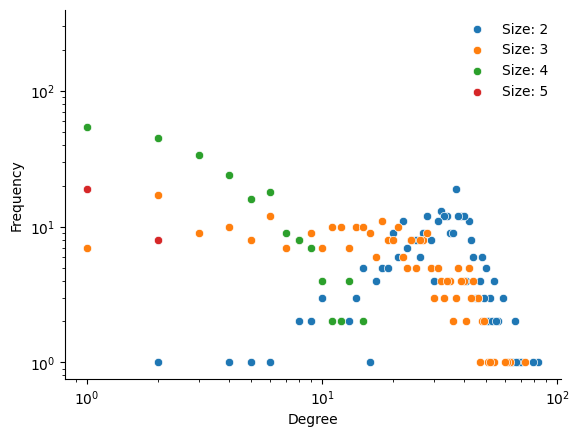

In [344]:
from hnx.viz.plot import plot_degree_distributions

plot_degree_distributions(H, max_size=5)

### B) Motifs 
(exact approach only)

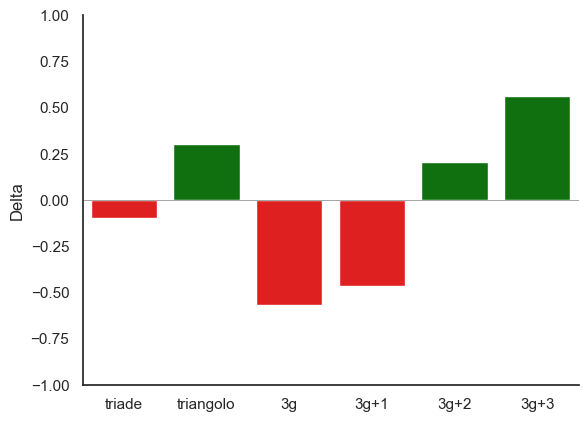

In [404]:
from hnx.motifs.motifs import compute_motifs
import seaborn as sns
import matplotlib.pyplot as plt

motifs3 = [-0.09743189457908542, 0.3057352878609137, -0.5664795273602301, -0.46704869712770475, 0.20599282046932665, 0.5617529503113179]

# plot a bar chart of the motif counts
cols = ['red' if (x < 0) else 'green' for x in motifs3]
g = sns.barplot(x=["triade", "triangolo", "3g", "3g+1", "3g+2", "3g+3"], y=motifs3, palette=cols)
g.axhline(0, color="grey", linewidth=0.5)
plt.ylim(-1, 1)
plt.ylabel("Delta")
sns.despine()
plt.savefig("motifs3.svg", bbox_inches="tight")

### C) Communities 
(one approach only) and comparison with metadata

In [79]:
# Model training
model = HypergraphMT(verbose=False)
u, w, maxL = model.fit(H, K=5, seed=10, normalizeU=False, out_inference=False, )

KeyboardInterrupt: 

In [ ]:
# TODO: Marti - plot overlapping communities vs metadata (probably on the clique expansion) 
# - add draw_communities in viz

### D) Statistics of the filtered systems after applying SVH
(one statistic of Fede’s choice, for instance fraction of preserved higher-order interactions for each order after
applying the SVH filter. It is better if the dataset has at least 4 different orders, but again it is a trade-off)

In [350]:
from hnx.filters import get_svh
validated = get_svh(H, approximate_pvalue=True, mp=True)

In [376]:
import pandas as pd 

df = pd.DataFrame()

for size in validated:
    data = validated[size]
    print(len(data))
    for d in range(data.shape[0]):
        df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
    data = data[data['fdr']]
    print(len(data))
    for d in range(data.shape[0]):
        df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)

5498


/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: 

1217


/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/24

2091


/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: 

518


/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Number of validated interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/24

222
62
7
0


/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'size': size, 'fdr': 'Total number of interactions'}, ignore_index=True)
/var/folders/9b/vlz7rpcd3z9_4909fj8gt6rw0000gn/T/ipykernel_93671/2425096815.py:9: 

In [374]:
df

size    fdr
0        2  False
1        2  False
2        2  False
3        2  False
4        2  False
...    ...    ...
9610     5  False
9611     5  False
9612     5  False
9613     5  False
9614     5  False

[9615 rows x 2 columns]

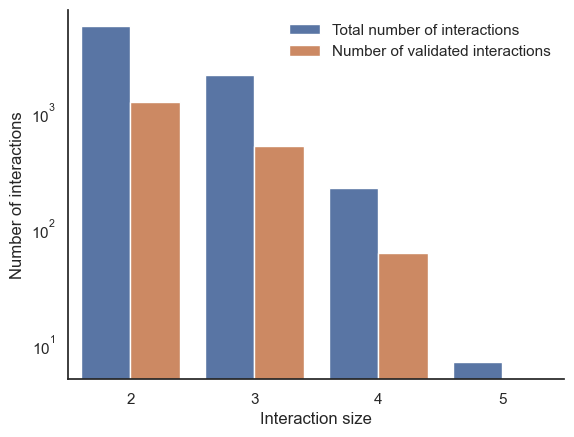

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
g = sns.countplot(data=df, x="size", hue="fdr")
plt.ylabel("Number of interactions")
plt.yscale("log")
plt.xlabel("Interaction size")
sns.despine()

plt.legend(frameon=False)

### E) Ability of the sampling method to reproduce one measure 
(one centrality measure distribution not covered so far)

In [4]:
import random

from hnx.communities.hy_mmsbm.model import HyMMSBM
from hnx.generation.hy_mmsbm_sampling import HyMMSBMSampler
from hnx.measures.sub_hypergraph_centrality import subhypergraph_centrality

In [5]:
SEED = 112233
np.random.seed(SEED)
random.seed(SEED)

# First, infer generative parameters utilizing Hy-MMSBM.
model = HyMMSBM(K=9, assortative=True)
model.fit(H, n_iter=100)

# Sample based on these
sampler = HyMMSBMSampler(
    u = model.u,
    w = model.w,
    max_hye_size = None,
    exact_dyadic_sampling = True,
    burn_in_steps = 1000,
    intermediate_steps = 1000,
)
samples = sampler.sample(
    deg_seq = None,
    dim_seq = None,
    avg_deg = None,
    initial_hyg = H,
    allow_rescaling = False
)
sampled_h = [next(samples) for _ in range(10)]

../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: overflow encountered in expm1
  np.expm1(prob_new) / np.expm1(prob_old),
../hnx/generation/hy_mmsbm_sampling.py:489: RuntimeWarning: invalid value encountered in double_scalars
  np.expm1(prob_new) / np.expm1(prob_old),


In [7]:
samples_centr = [subhypergraph_centrality(h) for h in sampled_h]
original_centr = subhypergraph_centrality(H)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


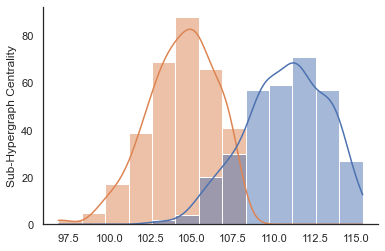

In [43]:
SAMPLE_IDX = 0
sample_centr = samples_centr[SAMPLE_IDX]

sns.set_theme(style="white")
sns.histplot(
    {
        "Dataset": original_centr,
        "Sample": samples_centr[SAMPLE_IDX]
    },
    kde=True,
)
sns.despine()

plt.ylabel("Sub-Hypergraph Centrality")

plt.legend(frameon=False)
plt.savefig("")

### F) Temporal higher-order properties
one plot from the work of Luca (let us produce an alternative figure with respect to the arXiv. It should be a figure less cool, we keep the cool figure for the original work (one centrality measure distribution not covered so far)

In [29]:
correlation_by_order = np.load("./_example_data/temporal_correlations.npy")

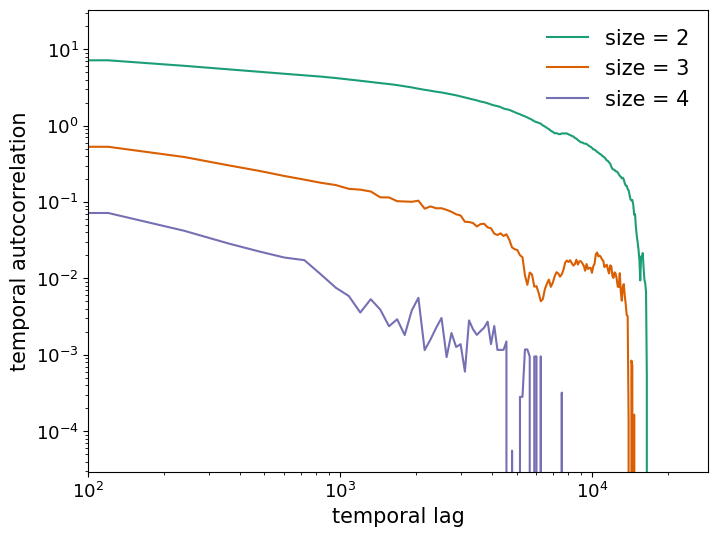

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for d in range(3):
    ax.plot(range(0,1440*20,6*20),correlation_by_order[d,:], label="size = %s" % (d+2),
                color=plt.cm.Dark2(d))

ax.set_xlabel("temporal lag",fontsize=15)
ax.set_ylabel("temporal autocorrelation",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.loglog()
ax.set_xlim(left=100,right=1441*20)

ax.legend(fontsize=15,frameon=False)

plt.show()

### G) Statistics of a higher-order spreading process run on top of it 
(e.g. number of infected individuals as a function of time for some parameters lambda pairwise and triangles (please write the value of the parameters in the main text or in the caption). I suggest we choose a social system, because otherwise this does not make sense

In [ ]:
# TODO

### H) 2 or 3 of different visualizations 
chosen by Francesco and Martina.

In [311]:
H = load_hypergraph("../test_data/hs/hs_one_class.pickle", "pickle")
print(H)

Hypergraph with 40 nodes and 955 edges.
Distribution of hyperedge sizes: {2: 570, 3: 345, 4: 38, 5: 2}


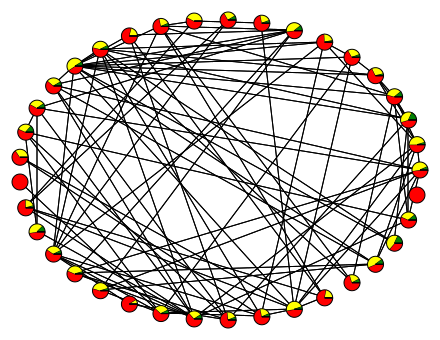

In [183]:
from hnx.viz.draw_pie import draw_pie
from IPython.display import SVG

SVG(draw_pie(H, num_edges=100))

In [312]:
from hnx.filters import get_svh

hs_svh = get_svh(H, approximate_pvalue=True, mp=True)

In [338]:
e4 = hs_svh[4]
e4 = e4[e4['fdr']]
lim = e4['pvalue']
lim = list(lim)
lim = list(sorted(lim))
print(lim)
lim = lim[3]

[1.7476793314781848e-13, 6.087861861602061e-11, 7.104492383003577e-10, 7.222002313850705e-09, 3.6406034077450105e-07, 4.859228967489003e-07, 8.05946252278273e-07, 9.598837894193928e-07]


In [339]:
edges = []
lim = float(lim)

for size in hs_svh:
    for i in range(len(hs_svh[size])):
        a = float(hs_svh[size]['pvalue'][i])
        b = bool(hs_svh[size]['fdr'][i])
        if a <= lim and b:
            edges.append(hs_svh[size]['edge'][i])

print(len(edges))

H2 = Hypergraph(edges)
lcc = H2.largest_component()
H2 = H2.subhypergraph(lcc)


77


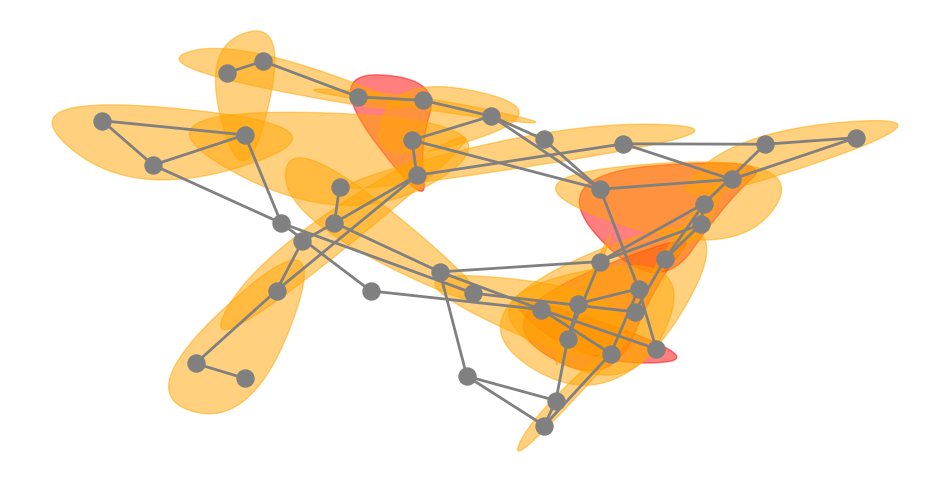

In [340]:
figsize = (12,6)
plt.figure(figsize = figsize)
draw_HG(H2, link_color='grey', node_color='gray', hyperlink_color_by_order = {2:'orange', 3:'r'})

In [ ]:
# TODO: Francesco and Marti

# MC: it would be nice if one plot is the representation of the hypernetwork with the hypergraph visualization 

In [ ]:
# So far they do not look nice

KeyboardInterrupt: 

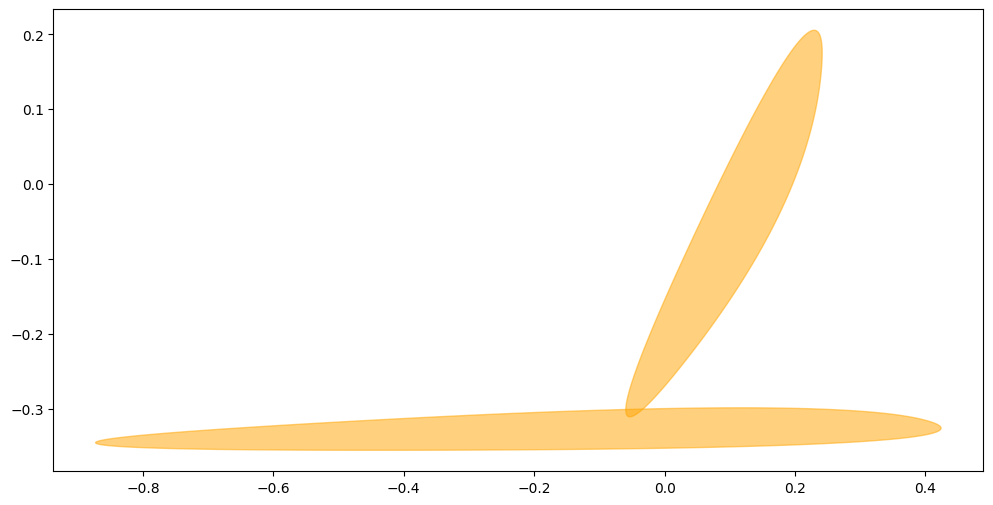

In [194]:
figsize = (12,6)
plt.figure(figsize = figsize)
draw_HG(H, link_color='grey', node_color='gray', hyperlink_color_by_order = {2:'orange', 3:'r'})

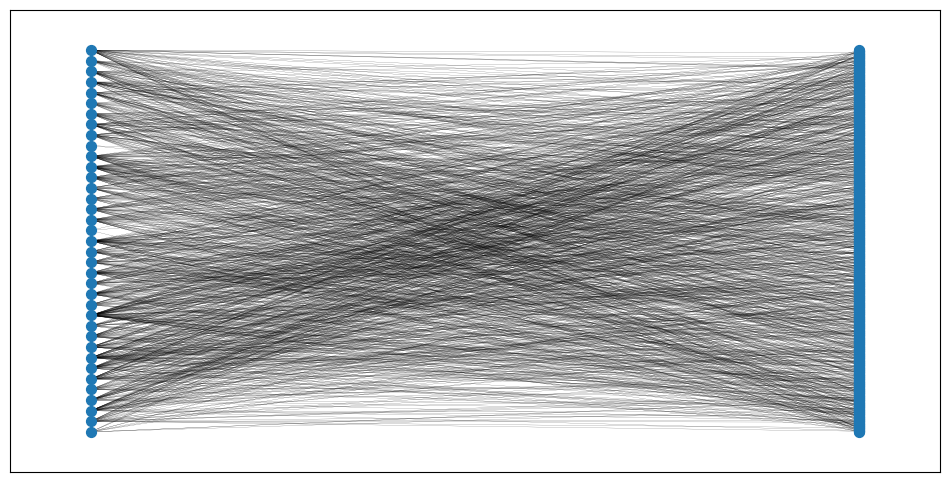

In [202]:
figsize = (12,6)
plt.figure(figsize = figsize)
draw_bipartite(H, node_size=50, with_labels=False, width=0.1)
plt.show()

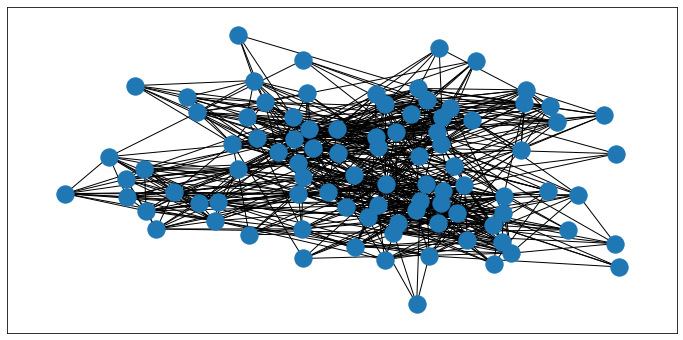

In [ ]:
figsize = (12,6)
plt.figure(figsize = figsize)
draw_clique(H, with_labels=False)
plt.show()